In [1]:
import pandas as pd
import numpy as np
import tweepy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pranjubindu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def change_text(a):
    a=str(a)
    text=re.sub('[^a-zA-Z]',' ',a)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemmatizer=WordNetLemmatizer()
    text=[lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text

In [3]:
df= pd.read_csv('Twitter_Data.csv',encoding='latin-1')
print(df.head())

                                               tweet  label
0  when modi promised âminimum government maxim...   -1.0
1  talk all the nonsense and continue all the dra...    0.0
2  what did just say vote for modi  welcome bjp t...    1.0
3  asking his supporters prefix chowkidar their n...    1.0
4  answer who among these the most powerful world...    1.0


In [4]:
df.isnull().sum()

tweet    4
label    7
dtype: int64

In [5]:
df['tweet']=df['tweet'].apply(change_text)
df.head()

,tweet,label
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


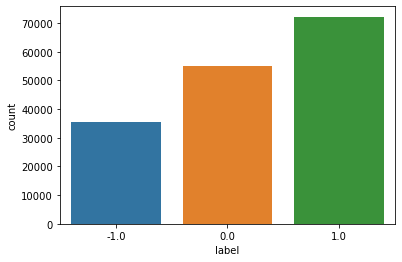

In [6]:
df['label'].value_counts()
sns.countplot('label',data=df)

In [7]:
df = df.dropna()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf = True)
X1 = vectorizer.fit_transform(df['tweet'])
y=df['label']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=42)

In [15]:
from sklearn import svm
classifier_linear = svm.SVC(kernel='linear',C = 1.0,gamma='auto')

In [ ]:
classifier_linear.fit(x_train, y_train)

In [ ]:
prediction_linear = classifier_linear.predict(x_test)

In [14]:
classifier_linear.score(y_test,prediction_linear)

NameError: name 'prediction_linear' is not defined